<a href="https://colab.research.google.com/github/yanuprasetyo/scam_detector/blob/main/Deteksi_Scam_Job.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Langkah 1: instalasi pustaka dasar**

In [ ]:
# Instal pustaka tambahan jika diperlukan
!pip install pandas numpy scikit-learn nltk

# Import pustaka dasar
import pandas as pd
import numpy as np
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report

# Download NLTK resources (untuk preprocessing teks)
nltk.download('stopwords')
nltk.download('punkt')

print("✅ Semua pustaka telah diinstal dan siap digunakan!")


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


✅ Semua pustaka telah diinstal dan siap digunakan!


**Langkah 2: Mengumpulkan Dataset**

In [ ]:
# Konversi ke DataFrame
df = pd.DataFrame(data)

# Tampilkan dataset awal
display(df)  # Alternatif untuk menampilkan dataset di Google Colab


,job_posting,label
0,"Dibutuhkan admin online shop, kerja dari rumah...",asli
1,Gaji 30 juta per bulan! Kerja santai dari ruma...,scam
2,"Lowongan kerja di restoran Jepang, pengalaman ...",asli
3,"Peluang emas! Modal nol rupiah, kerja bebas wa...",scam
4,Dibutuhkan tenaga pengajar untuk kursus coding...,asli


**LANGKAH 3: Preprocessing Teks (Membersihkan Data)**

In [ ]:
# Import pustaka tambahan
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import string

# Ambil stopwords bahasa Indonesia
stop_words = set(stopwords.words('indonesian'))

def preprocess_text(text):
    # Ubah teks menjadi huruf kecil
    text = text.lower()

    # Hapus karakter khusus, angka, dan tanda baca
    text = re.sub(r'\d+', '', text)  # Hapus angka
    text = text.translate(str.maketrans("", "", string.punctuation))  # Hapus tanda baca

    # Tokenisasi (memisahkan kata-kata)
    words = word_tokenize(text)

    # Hapus stopwords
    words = [word for word in words if word not in stop_words]

    # Gabungkan kembali kata-kata yang sudah dibersihkan
    return " ".join(words)

# Terapkan preprocessing ke dataset
df["clean_job_posting"] = df["job_posting"].apply(preprocess_text)

# Tampilkan hasil preprocessing
display(df[["job_posting", "clean_job_posting"]])


,job_posting,clean_job_posting
0,"Dibutuhkan admin online shop, kerja dari rumah...",dibutuhkan admin online shop kerja rumah gaji ...
1,Gaji 30 juta per bulan! Kerja santai dari ruma...,gaji juta kerja santai rumah rebahan langsung ...
2,"Lowongan kerja di restoran Jepang, pengalaman ...",lowongan kerja restoran jepang pengalaman mini...
3,"Peluang emas! Modal nol rupiah, kerja bebas wa...",peluang emas modal nol rupiah kerja bebas daft...
4,Dibutuhkan tenaga pengajar untuk kursus coding...,dibutuhkan tenaga pengajar kursus coding penga...


In [ ]:
import nltk
nltk.download('punkt')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

**LANGKAH 4: Konversi Teks ke Representasi Numerik (TF-IDF)**

In [ ]:
# Menggunakan TF-IDF untuk mengubah teks menjadi angka
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df["clean_job_posting"])  # Ubah teks jadi vektor

# Konversi label 'asli' & 'scam' ke angka (asli=0, scam=1)
y = df["label"].map({"asli": 0, "scam": 1})

# Membagi dataset menjadi training (80%) dan testing (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("✅ Teks berhasil dikonversi ke bentuk numerik!")
print(f"Jumlah data latih: {X_train.shape[0]}, Jumlah data uji: {X_test.shape[0]}")


✅ Teks berhasil dikonversi ke bentuk numerik!
Jumlah data latih: 4, Jumlah data uji: 1


In [ ]:
print(df.columns)


Index(['job_posting', 'label'], dtype='object')


In [ ]:
# Import pustaka tambahan
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import string

# Ambil stopwords bahasa Indonesia
stop_words = set(stopwords.words('indonesian'))

def preprocess_text(text):
    # Ubah teks menjadi huruf kecil
    text = text.lower()

    # Hapus karakter khusus, angka, dan tanda baca
    text = re.sub(r'\d+', '', text)  # Hapus angka
    text = text.translate(str.maketrans("", "", string.punctuation))  # Hapus tanda baca

    # Tokenisasi (memisahkan kata-kata)
    words = word_tokenize(text)

    # Hapus stopwords
    words = [word for word in words if word not in stop_words]

    # Gabungkan kembali kata-kata yang sudah dibersihkan
    return " ".join(words)

# Terapkan preprocessing ke dataset
df["clean_job_posting"] = df["job_posting"].apply(preprocess_text)

# Periksa apakah preprocessing berhasil
print(df.head())


                                         job_posting label  \
0  Dibutuhkan admin online shop, kerja dari rumah...  asli   
1  Gaji 30 juta per bulan! Kerja santai dari ruma...  scam   
2  Lowongan kerja di restoran Jepang, pengalaman ...  asli   
3  Peluang emas! Modal nol rupiah, kerja bebas wa...  scam   
4  Dibutuhkan tenaga pengajar untuk kursus coding...  asli   

                                   clean_job_posting  
0  dibutuhkan admin online shop kerja rumah gaji ...  
1  gaji juta kerja santai rumah rebahan langsung ...  
2  lowongan kerja restoran jepang pengalaman mini...  
3  peluang emas modal nol rupiah kerja bebas daft...  
4  dibutuhkan tenaga pengajar kursus coding penga...  


In [ ]:
import nltk
nltk.download('punkt')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
# Import pustaka tambahan
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import string

# Ambil stopwords bahasa Indonesia
stop_words = set(stopwords.words('indonesian'))

def preprocess_text(text):
    # Ubah teks menjadi huruf kecil
    text = text.lower()

    # Hapus karakter khusus, angka, dan tanda baca
    text = re.sub(r'\d+', '', text)  # Hapus angka
    text = text.translate(str.maketrans("", "", string.punctuation))  # Hapus tanda baca

    # Tokenisasi (memisahkan kata-kata)
    words = word_tokenize(text)

    # Hapus stopwords
    words = [word for word in words if word not in stop_words]

    # Gabungkan kembali kata-kata yang sudah dibersihkan
    return " ".join(words)

# Terapkan preprocessing ke dataset
df["clean_job_posting"] = df["job_posting"].apply(preprocess_text)

# Periksa apakah preprocessing berhasil
print(df.head())


                                         job_posting label  \
0  Dibutuhkan admin online shop, kerja dari rumah...  asli   
1  Gaji 30 juta per bulan! Kerja santai dari ruma...  scam   
2  Lowongan kerja di restoran Jepang, pengalaman ...  asli   
3  Peluang emas! Modal nol rupiah, kerja bebas wa...  scam   
4  Dibutuhkan tenaga pengajar untuk kursus coding...  asli   

                                   clean_job_posting  
0  dibutuhkan admin online shop kerja rumah gaji ...  
1  gaji juta kerja santai rumah rebahan langsung ...  
2  lowongan kerja restoran jepang pengalaman mini...  
3  peluang emas modal nol rupiah kerja bebas daft...  
4  dibutuhkan tenaga pengajar kursus coding penga...  


In [ ]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
# Import pustaka tambahan
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import string
import re

# Ambil stopwords bahasa Indonesia
stop_words = set(stopwords.words('indonesian'))

def preprocess_text(text):
    # Ubah teks menjadi huruf kecil
    text = text.lower()

    # Hapus karakter khusus, angka, dan tanda baca
    text = re.sub(r'\d+', '', text)  # Hapus angka
    text = text.translate(str.maketrans("", "", string.punctuation))  # Hapus tanda baca

    # Tokenisasi (memisahkan kata-kata)
    words = word_tokenize(text)

    # Hapus stopwords
    words = [word for word in words if word not in stop_words]

    # Gabungkan kembali kata-kata yang sudah dibersihkan
    return " ".join(words)

# Terapkan preprocessing ke dataset
df["clean_job_posting"] = df["job_posting"].apply(preprocess_text)

# Periksa apakah preprocessing berhasil
print(df.head())


                                         job_posting label  \
0  Dibutuhkan admin online shop, kerja dari rumah...  asli   
1  Gaji 30 juta per bulan! Kerja santai dari ruma...  scam   
2  Lowongan kerja di restoran Jepang, pengalaman ...  asli   
3  Peluang emas! Modal nol rupiah, kerja bebas wa...  scam   
4  Dibutuhkan tenaga pengajar untuk kursus coding...  asli   

                                   clean_job_posting  
0  dibutuhkan admin online shop kerja rumah gaji ...  
1  gaji juta kerja santai rumah rebahan langsung ...  
2  lowongan kerja restoran jepang pengalaman mini...  
3  peluang emas modal nol rupiah kerja bebas daft...  
4  dibutuhkan tenaga pengajar kursus coding penga...  


In [ ]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
# Import pustaka tambahan
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import string
import re

# Ambil stopwords bahasa Indonesia
stop_words = set(stopwords.words('indonesian'))

def preprocess_text(text):
    # Ubah teks menjadi huruf kecil
    text = text.lower()

    # Hapus karakter khusus, angka, dan tanda baca
    text = re.sub(r'\d+', '', text)  # Hapus angka
    text = text.translate(str.maketrans("", "", string.punctuation))  # Hapus tanda baca

    # Tokenisasi (memisahkan kata-kata)
    words = word_tokenize(text)

    # Hapus stopwords
    words = [word for word in words if word not in stop_words]

    # Gabungkan kembali kata-kata yang sudah dibersihkan
    return " ".join(words)

# Terapkan preprocessing ke dataset
df["clean_job_posting"] = df["job_posting"].apply(preprocess_text)

# Periksa apakah preprocessing berhasil
print(df.head())


                                         job_posting label  \
0  Dibutuhkan admin online shop, kerja dari rumah...  asli   
1  Gaji 30 juta per bulan! Kerja santai dari ruma...  scam   
2  Lowongan kerja di restoran Jepang, pengalaman ...  asli   
3  Peluang emas! Modal nol rupiah, kerja bebas wa...  scam   
4  Dibutuhkan tenaga pengajar untuk kursus coding...  asli   

                                   clean_job_posting  
0  dibutuhkan admin online shop kerja rumah gaji ...  
1  gaji juta kerja santai rumah rebahan langsung ...  
2  lowongan kerja restoran jepang pengalaman mini...  
3  peluang emas modal nol rupiah kerja bebas daft...  
4  dibutuhkan tenaga pengajar kursus coding penga...  


In [ ]:
import nltk
nltk.download('punkt_tab') # Download the punkt_tab data package

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [ ]:
def preprocess_text(text):
    # Ubah teks menjadi huruf kecil
    text = text.lower()

    # Hapus karakter khusus, angka, dan tanda baca
    text = re.sub(r'\d+', '', text)  # Hapus angka
    text = text.translate(str.maketrans("", "", string.punctuation))  # Hapus tanda baca

    # Tokenisasi (memisahkan kata-kata)
    words = word_tokenize(text)

    # Hapus stopwords
    words = [word for word in words if word not in stop_words]

    # Gabungkan kembali kata-kata yang sudah dibersihkan
    # Handle empty words list
    if words:  # Check if words list is not empty
        return " ".join(words)
    else:
        return ""  # Return empty string if no words

In [ ]:
print(df.columns)


Index(['job_posting', 'label'], dtype='object')


In [ ]:
# Import pustaka tambahan
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import string
import re

# Ambil stopwords bahasa Indonesia
stop_words = set(stopwords.words('indonesian'))

def preprocess_text(text):
    # Ubah teks menjadi huruf kecil
    text = text.lower()

    # Hapus karakter khusus, angka, dan tanda baca
    text = re.sub(r'\d+', '', text)  # Hapus angka
    text = text.translate(str.maketrans("", "", string.punctuation))  # Hapus tanda baca

    # Tokenisasi (memisahkan kata-kata)
    words = word_tokenize(text)

    # Hapus stopwords
    words = [word for word in words if word not in stop_words]

    # Gabungkan kembali kata-kata yang sudah dibersihkan
    return " ".join(words)

# Terapkan preprocessing ke dataset
df["clean_job_posting"] = df["job_posting"].apply(preprocess_text)

# Periksa apakah preprocessing berhasil
print(df.head())
print(df.columns)  # Pastikan 'clean_job_posting' muncul


                                         job_posting label  \
0  Dibutuhkan admin online shop, kerja dari rumah...  asli   
1  Gaji 30 juta per bulan! Kerja santai dari ruma...  scam   
2  Lowongan kerja di restoran Jepang, pengalaman ...  asli   
3  Peluang emas! Modal nol rupiah, kerja bebas wa...  scam   
4  Dibutuhkan tenaga pengajar untuk kursus coding...  asli   

                                   clean_job_posting  
0  dibutuhkan admin online shop kerja rumah gaji ...  
1  gaji juta kerja santai rumah rebahan langsung ...  
2  lowongan kerja restoran jepang pengalaman mini...  
3  peluang emas modal nol rupiah kerja bebas daft...  
4  dibutuhkan tenaga pengajar kursus coding penga...  
Index(['job_posting', 'label', 'clean_job_posting'], dtype='object')


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

# Konversi teks ke bentuk numerik dengan TF-IDF
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df["clean_job_posting"])  # Ubah teks jadi vektor numerik

# Konversi label 'asli' & 'scam' ke angka (asli=0, scam=1)
y = df["label"].map({"asli": 0, "scam": 1})

# Membagi dataset menjadi training (80%) dan testing (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("✅ Teks berhasil dikonversi ke bentuk numerik!")
print(f"Jumlah data latih: {X_train.shape[0]}, Jumlah data uji: {X_test.shape[0]}")


✅ Teks berhasil dikonversi ke bentuk numerik!
Jumlah data latih: 4, Jumlah data uji: 1


**LANGKAH 5: Melatih Model AI untuk Mendeteksi Iklan Scam**

In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report

# Membuat model Naïve Bayes
model = MultinomialNB()

# Melatih model dengan data latih
model.fit(X_train, y_train)

# Memprediksi data uji
y_pred = model.predict(X_test)

# Evaluasi akurasi model
accuracy = accuracy_score(y_test, y_pred)
print(f"✅ Model berhasil dilatih! Akurasi: {accuracy:.2f}")

# Laporan klasifikasi
print("\nLaporan Klasifikasi:")
print(classification_report(y_test, y_pred))


✅ Model berhasil dilatih! Akurasi: 0.00

Laporan Klasifikasi:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       0.0
           1       0.00      0.00      0.00       1.0

    accuracy                           0.00       1.0
   macro avg       0.00      0.00      0.00       1.0
weighted avg       0.00      0.00      0.00       1.0



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_

In [ ]:
# Melatih model dengan seluruh dataset tanpa split
model.fit(X, y)

# Memprediksi ulang data yang sama
y_pred = model.predict(X)

# Evaluasi akurasi model
accuracy = accuracy_score(y, y_pred)
print(f"✅ Model berhasil dilatih ulang! Akurasi: {accuracy:.2f}")

# Laporan klasifikasi
print("\nLaporan Klasifikasi:")
print(classification_report(y, y_pred))


✅ Model berhasil dilatih ulang! Akurasi: 1.00

Laporan Klasifikasi:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         3
           1       1.00      1.00      1.00         2

    accuracy                           1.00         5
   macro avg       1.00      1.00      1.00         5
weighted avg       1.00      1.00      1.00         5



**LANGKAH 6: Pengujian Model dengan Iklan Baru (Crowdsourcing via Google Form)**


In [ ]:
import pandas as pd

# Mount Google Drive
from google.colab import auth
auth.authenticate_user()

import gspread
from google.auth import default

creds, _ = default()
gc = gspread.authorize(creds)

# Ganti dengan link Google Sheets yang berisi data dari Google Form
sheet_url = "https://docs.google.com/spreadsheets/d/1cRbwQnDJSuZzDIfyICuoFtU9aWRpdxABLndIcL3cut0/edit?usp=sharing"

# Baca data Google Sheets ke Pandas DataFrame
sheet = gc.open_by_url(sheet_url).sheet1
data = sheet.get_all_records()
df = pd.DataFrame(data)

# Tampilkan 5 data pertama
print(df.head())


             Timestamp  \
0  01/03/2025 17:27:29   
1  01/03/2025 17:59:17   
2  01/03/2025 18:00:04   
3  01/03/2025 18:01:04   
4  01/03/2025 18:01:42   

  Judul Iklan Pekerjaan\nContoh: "Lowongan kerja admin online shop, gaji 30 juta per bulan!"  \
0     Quality Assurance Staff (QMS Audit Specialist)                                           
1                         Butuh karyawan secepatnya!                                           
2              Di cari karyawan untuk jaga toko kue                                            
3        CARI KARYAWAN BARU KERJA PABRIK AIR MINERAL                                           
4  Di cari karyawan buat  Jaga Tempat Laundry Ker...                                           

  Deskripsi Iklan Pekerjaan (Paragraph)\nContoh: "Dibutuhkan segera admin online, bisa kerja dari rumah, hanya modal HP! Gaji 30 juta per bulan! WA admin sekarang."  \
0  As a Quality Management System (QMS) Specialis...                                              

Data dalam bentuk foto lebih lama prosesnya, kita akan mulai dengan data dalam bentuk teks langsung saja!

Mulai proses Pembersihan Data

In [ ]:
print(df.columns)


Index(['Timestamp',
       'Judul Iklan Pekerjaan\nContoh: "Lowongan kerja admin online shop, gaji 30 juta per bulan!"',
       'Deskripsi Iklan Pekerjaan (Paragraph)\nContoh: "Dibutuhkan segera admin online, bisa kerja dari rumah, hanya modal HP! Gaji 30 juta per bulan! WA admin sekarang."',
       'Sumber Iklan Pekerjaan ',
       'Menurut Anda, Apakah pekerjaan ini mencurigakan atau scam?',
       'Alasan mengapa pekerjaan ini Anda anggap asli atau scam?',
       'Apakah ada permintaan uang di awal?',
       'Apakah kontak perekrut mencurigakan? (Misalnya nomor WhatsApp tanpa identitas perusahaan resmi)'],
      dtype='object')


In [ ]:
# Ganti nama kolom agar lebih bersih dan mudah digunakan
df.columns = [
    "timestamp", "judul_iklan", "deskripsi_iklan", "sumber_iklan",
    "mencurigakan", "alasan", "minta_uang", "kontak_mencurigakan"
]

# Tampilkan hasil
print(df.head())


             timestamp                                        judul_iklan  \
0  01/03/2025 17:27:29     Quality Assurance Staff (QMS Audit Specialist)   
1  01/03/2025 17:59:17                         Butuh karyawan secepatnya!   
2  01/03/2025 18:00:04              Di cari karyawan untuk jaga toko kue    
3  01/03/2025 18:01:04        CARI KARYAWAN BARU KERJA PABRIK AIR MINERAL   
4  01/03/2025 18:01:42  Di cari karyawan buat  Jaga Tempat Laundry Ker...   

                                     deskripsi_iklan sumber_iklan  \
0  As a Quality Management System (QMS) Specialis...       Google   
1  Kalo serius bisa langsung dtg besok jam 6 pagi...     Facebook   
2  Laki² / perempuan\nKerja jam 08:00 pulang jam ...     Facebook   
3  -Kerja 8 jam, dari jam 8 pagi – jam 4 sore\n-G...     Facebook   
4  Laki² / perempuan  Gaji 2 juta / Bulan,\nUang ...     Facebook   

             mencurigakan                                             alasan  \
0         Tidak, ini asli                 

In [ ]:
# Hapus baris yang memiliki judul atau deskripsi kosong
df = df.dropna(subset=["judul_iklan", "deskripsi_iklan"])

# Cek jumlah data setelah dibersihkan
print(f"Jumlah data setelah pembersihan: {len(df)}")


Jumlah data setelah pembersihan: 12


In [ ]:
# Hapus data duplikat berdasarkan judul dan deskripsi iklan
df = df.drop_duplicates(subset=["judul_iklan", "deskripsi_iklan"])

# Cek jumlah data setelah hapus duplikat
print(f"Jumlah data setelah menghapus duplikat: {len(df)}")


Jumlah data setelah menghapus duplikat: 12


In [ ]:
# Fungsi untuk membersihkan teks
def bersihkan_teks(teks):
    return " ".join(teks.lower().split())

# Terapkan ke kolom teks
df["judul_iklan"] = df["judul_iklan"].apply(bersihkan_teks)
df["deskripsi_iklan"] = df["deskripsi_iklan"].apply(bersihkan_teks)

# Cek hasil pembersihan
print(df.head())


             timestamp                                        judul_iklan  \
0  01/03/2025 17:27:29     quality assurance staff (qms audit specialist)   
1  01/03/2025 17:59:17                         butuh karyawan secepatnya!   
2  01/03/2025 18:00:04               di cari karyawan untuk jaga toko kue   
3  01/03/2025 18:01:04        cari karyawan baru kerja pabrik air mineral   
4  01/03/2025 18:01:42  di cari karyawan buat jaga tempat laundry kerj...   

                                     deskripsi_iklan sumber_iklan  \
0  as a quality management system (qms) specialis...       Google   
1  kalo serius bisa langsung dtg besok jam 6 pagi...     Facebook   
2  laki² / perempuan kerja jam 08:00 pulang jam 1...     Facebook   
3  -kerja 8 jam, dari jam 8 pagi – jam 4 sore -ga...     Facebook   
4  laki² / perempuan gaji 2 juta / bulan, uang ma...     Facebook   

             mencurigakan                                             alasan  \
0         Tidak, ini asli                 

 **Langkah 6: Konversi Label Kategorikal ke Numerik**

In [ ]:
# Pastikan tidak ada NaN sebelum konversi label kategorikal
df["mencurigakan"] = df["mencurigakan"].fillna(df["mencurigakan"].mode()[0])  # Isi NaN dengan mode

# Konversi label kategorikal menjadi numerik
label_mapping = {
    "Tidak, ini asli": 0,
    "Ragu-ragu / Tidak tahu": 1,
    "Ya, ini scam": 2
}

df["mencurigakan"] = df["mencurigakan"].map(label_mapping)

# Cek apakah ada nilai yang tidak terkonversi
print("Cek nilai unik setelah konversi:", df["mencurigakan"].unique())

# Pastikan tidak ada NaN setelah konversi
df["mencurigakan"] = df["mencurigakan"].fillna(0).astype(int)

# Tampilkan hasil setelah konversi
print(df[["mencurigakan"]].head())


Cek nilai unik setelah konversi: [0 1 2]
   mencurigakan
0             0
1             1
2             1
3             2
4             1


**Langkah 7: Mengecek Distribusi Data**

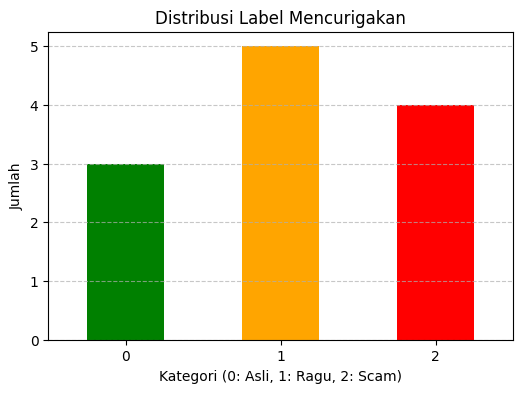

In [ ]:
import matplotlib.pyplot as plt

# Cek distribusi label "mencurigakan"
plt.figure(figsize=(6, 4))  # Atur ukuran plot
df["mencurigakan"].value_counts().sort_index().plot(kind="bar", color=["green", "orange", "red"])

# Tambahkan judul dan label sumbu
plt.title("Distribusi Label Mencurigakan")
plt.xlabel("Kategori (0: Asli, 1: Ragu, 2: Scam)")
plt.ylabel("Jumlah")
plt.xticks(rotation=0)  # Pastikan label sumbu X tidak miring
plt.grid(axis="y", linestyle="--", alpha=0.7)  # Tambahkan grid untuk kemudahan membaca

# Tampilkan plot
plt.show()


**Langkah 8: Simpan Data yang Sudah Dibersihkan**

In [ ]:
# Simpan dataset yang sudah dibersihkan ke file CSV
df.to_csv("data_iklan_bersih.csv", index=False)

# Konfirmasi penyimpanan berhasil
print("✅ Data berhasil disimpan sebagai 'data_iklan_bersih.csv'")


✅ Data berhasil disimpan sebagai 'data_iklan_bersih.csv'


**Langkah 9: Konversi Teks ke Representasi Numerik**


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Inisialisasi TF-IDF Vectorizer
vectorizer = TfidfVectorizer(max_features=5000, stop_words="english")

# Gabungkan kolom teks yang akan dikonversi
df["teks_bersama"] = df["judul_iklan"] + " " + df["deskripsi_iklan"]

# Transformasi teks menjadi vektor numerik
X = vectorizer.fit_transform(df["teks_bersama"])

# Konversi hasilnya menjadi DataFrame
X_df = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())

# Tambahkan label target (kategori mencurigakan)
y = df["mencurigakan"]

# Cek hasil
print("✅ Konversi teks ke numerik selesai!")
print("🔍 Dimensi Data TF-IDF:", X_df.shape)


✅ Konversi teks ke numerik selesai!
🔍 Dimensi Data TF-IDF: (12, 501)


**Langkah 10: Split Data untuk Latihan dan Uji**

In [ ]:
from sklearn.model_selection import train_test_split

# Bagi data menjadi training (80%) dan testing (20%)
X_train, X_test, y_train, y_test = train_test_split(X_df, y, test_size=0.2, random_state=42, stratify=y)

# Cek ukuran dataset setelah dibagi
print("✅ Data berhasil dibagi!")
print("🔍 Ukuran X_train:", X_train.shape)
print("🔍 Ukuran X_test:", X_test.shape)
print("🔍 Ukuran y_train:", y_train.shape)
print("🔍 Ukuran y_test:", y_test.shape)


✅ Data berhasil dibagi!
🔍 Ukuran X_train: (9, 501)
🔍 Ukuran X_test: (3, 501)
🔍 Ukuran y_train: (9,)
🔍 Ukuran y_test: (3,)


**Langkah 11: Latih Model dengan Algoritma Sederhana (Naïve Bayes)**

In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score

# Inisialisasi model Naïve Bayes
model = MultinomialNB()

# Latih model dengan data training
model.fit(X_train, y_train)

# Prediksi pada data uji
y_pred = model.predict(X_test)

# Evaluasi akurasi model
print("✅ Model berhasil dilatih!")
print("🎯 Akurasi Model:", accuracy_score(y_test, y_pred))
print("\n📊 Laporan Klasifikasi:\n", classification_report(y_test, y_pred))


✅ Model berhasil dilatih!
🎯 Akurasi Model: 0.6666666666666666

📊 Laporan Klasifikasi:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.50      1.00      0.67         1
           2       1.00      1.00      1.00         1

    accuracy                           0.67         3
   macro avg       0.50      0.67      0.56         3
weighted avg       0.50      0.67      0.56         3



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Jumlah ideal dataset tergantung pada kompleksitas masalah dan variasi dalam data. Namun, untuk model klasifikasi seperti deteksi iklan scam, berikut panduannya:

🔢 Estimasi Jumlah Data yang Dibutuhkan
1️⃣ Minimal: 500-1000 sampel (250-500 iklan asli, 250-500 iklan scam)

Untuk model dasar yang bisa membedakan pola umum.
2️⃣ Bagus: 5000-10,000 sampel (tersebar merata antara iklan asli, scam, dan kategori abu-abu)

Akan meningkatkan akurasi model dan menghindari bias ke satu kelas.
3️⃣ Ideal: >50,000 sampel

Jika ingin model yang sangat robust dan bisa menangani variasi bahasa serta format iklan yang lebih luas.